# Data Science Engineering Methods

Assignment 1 - ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

Scoring Rubric

Are my answers supported with data? (20 Points)

Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)

Public dataset (5 Points)

Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.

What code is yours and what have you adapted? (5 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.

Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.

Answers to listed questions (45 Points)

* Which independent variables are useful to predict a target (dependent variable)?

* Which independent variable have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013) Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

**Abstract**

Heart is one of the most vital organs in the body. This dataset aims to assist

In [3]:
!pip install ucimlrepo
!pip install eli5
!pip install scikit-learn==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=29cd14f0fe5f6c92dc72bbdb7cb39cbcb965cfa38888b7eff2f63e6335b3b158
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.15.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.0 which is incompatible.


### What are the data types? (Only numeric and categorical)

In [4]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
Y = heart_disease.data.targets

# metadata
#print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

#### Description of the variables present in the dataset:

age: The person's age in years
sex: The person's sex (1 = male, 0 = female)
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
target: Heart disease (0 = no, 1 = yes)

### Are there missing values?
Yes, the dataset has some missing values and it has been concluded by the isnull() method as shown below.
### Which independent variables have missing data? How much?
The amount of values missing in the columns has been calculated after writing a basic function to give the missing value percentage.

In [5]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [6]:
X.isnull().sum()/len(X)*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
dtype: float64

In [7]:
print(Y.min())
print(Y.max())
range = (Y.max() - Y.min())
print("The range for the target variable is :",range)

num    0
dtype: int64
num    4
dtype: int64
The range for the target variable is : num    4
dtype: int64


In [8]:
dataset = X.join(Y)
dataset.isnull().sum()
dataset = dataset.dropna()

### What are the likely distributions of the numeric variables?

<Figure size 1000x500 with 0 Axes>

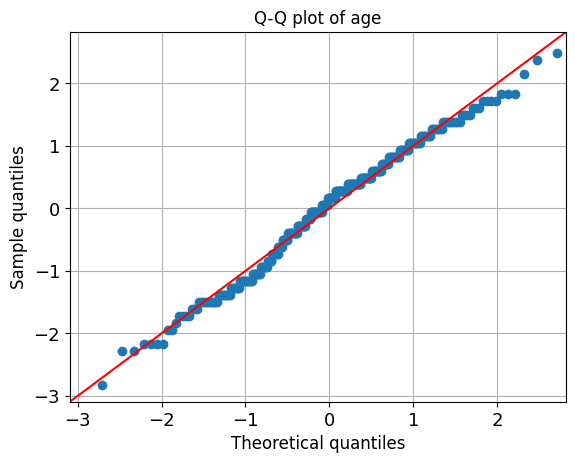

<Figure size 1000x500 with 0 Axes>

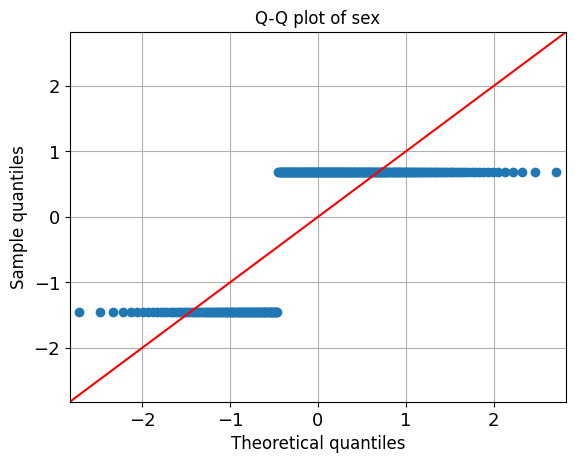

<Figure size 1000x500 with 0 Axes>

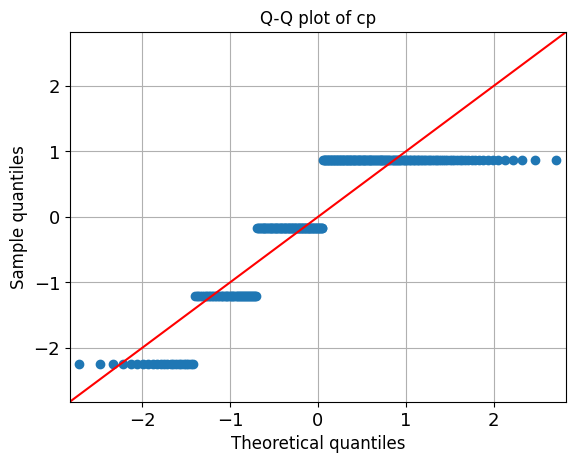

<Figure size 1000x500 with 0 Axes>

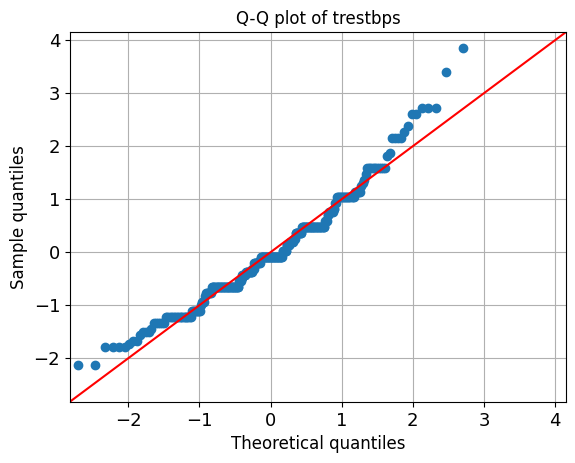

<Figure size 1000x500 with 0 Axes>

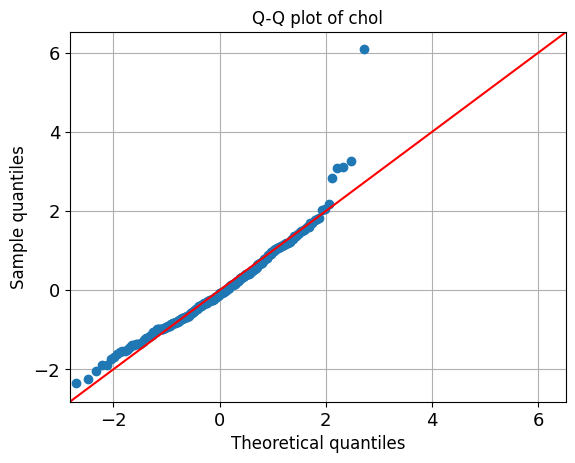

<Figure size 1000x500 with 0 Axes>

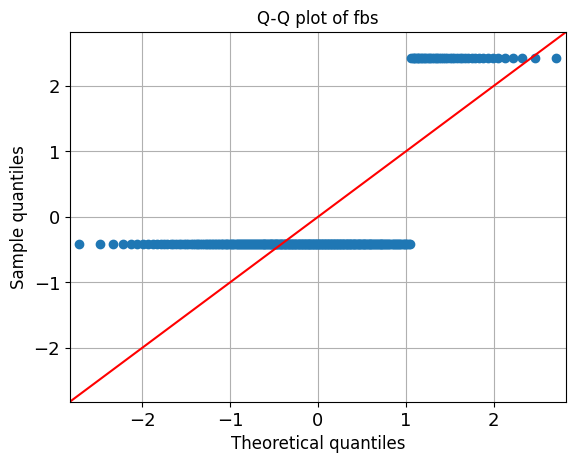

<Figure size 1000x500 with 0 Axes>

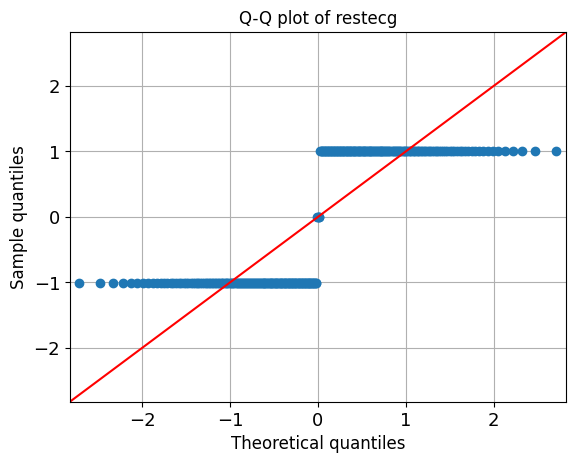

<Figure size 1000x500 with 0 Axes>

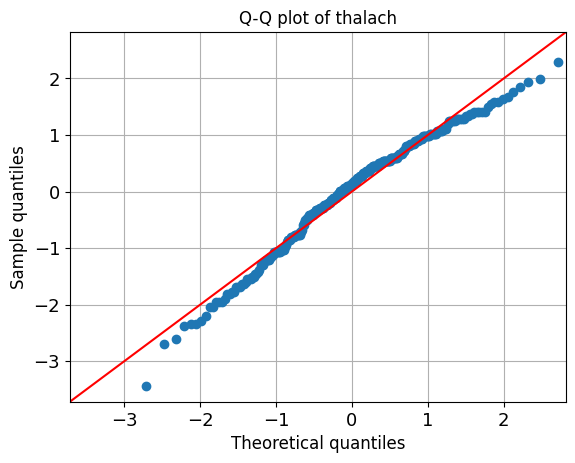

<Figure size 1000x500 with 0 Axes>

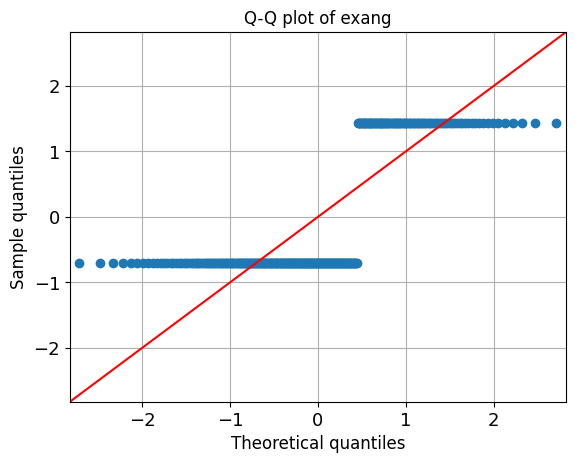

<Figure size 1000x500 with 0 Axes>

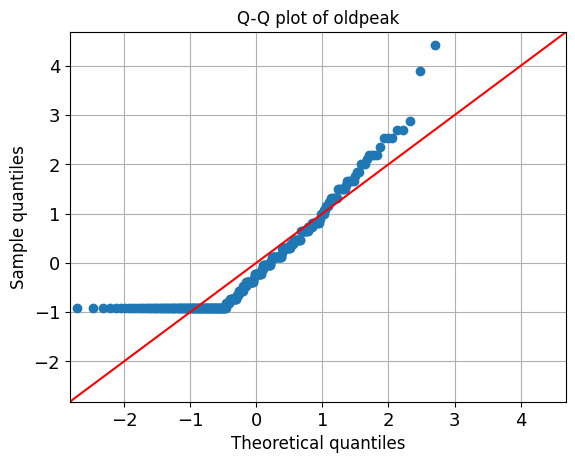

<Figure size 1000x500 with 0 Axes>

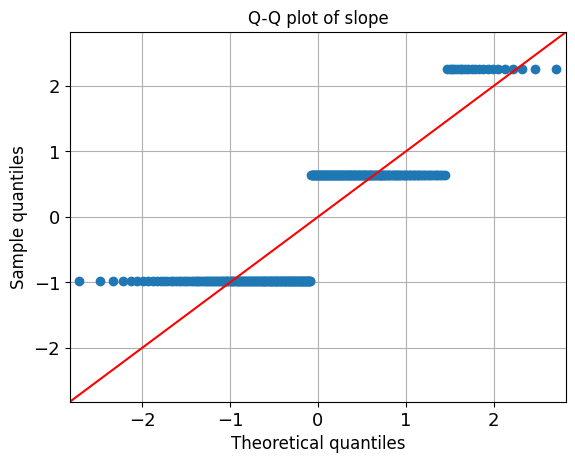

<Figure size 1000x500 with 0 Axes>

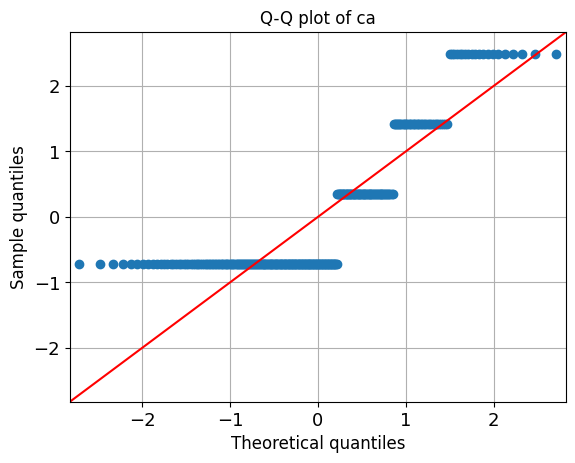

<Figure size 1000x500 with 0 Axes>

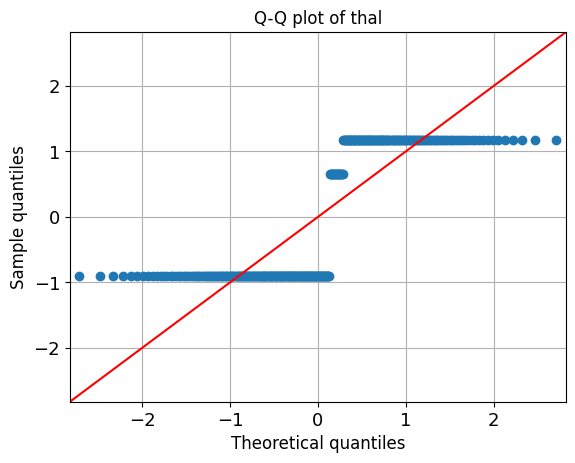

In [9]:
from statsmodels.graphics.gofplots import qqplot
data_features = dataset[
["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"]
]
for c in data_features.columns[:]:
    plt.figure(figsize=(10, 5))
    fig = qqplot(data_features[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=12)
    plt.ylabel("Sample quantiles", fontsize=12)
    plt.title("Q-Q plot of {}".format(c), fontsize=12)
    plt.grid(True)
    plt.show()

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


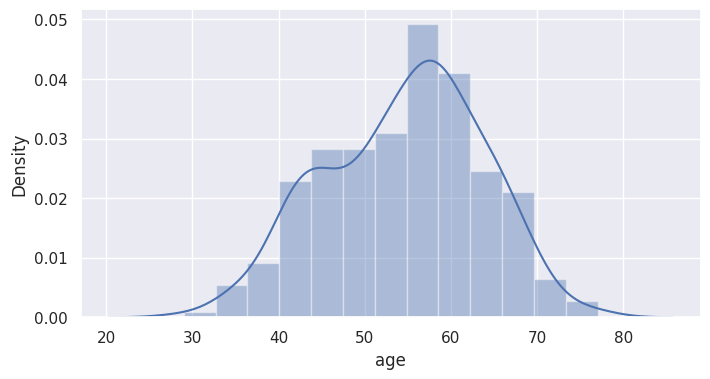

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


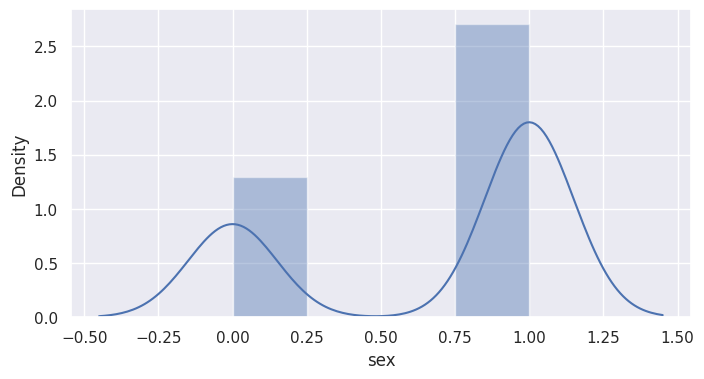

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


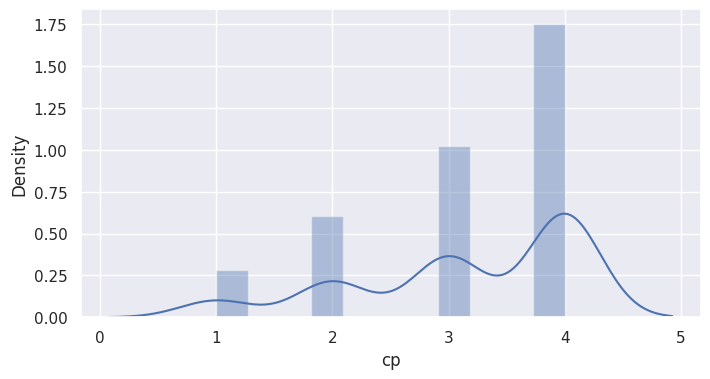

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


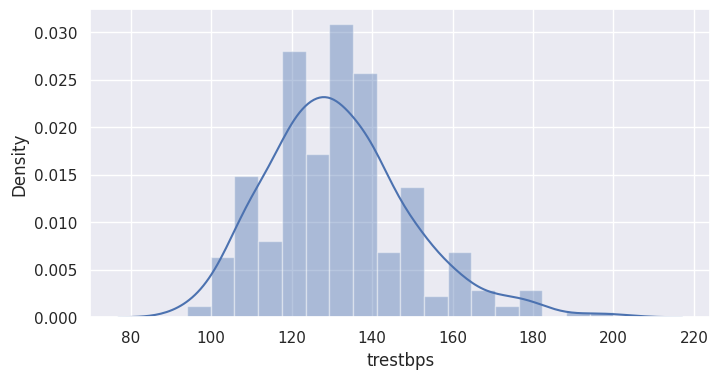

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


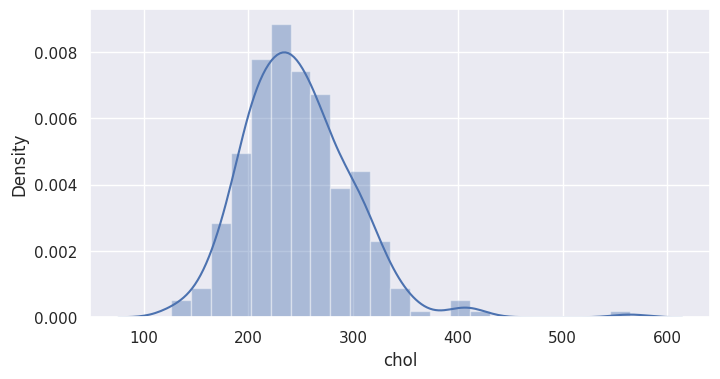

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


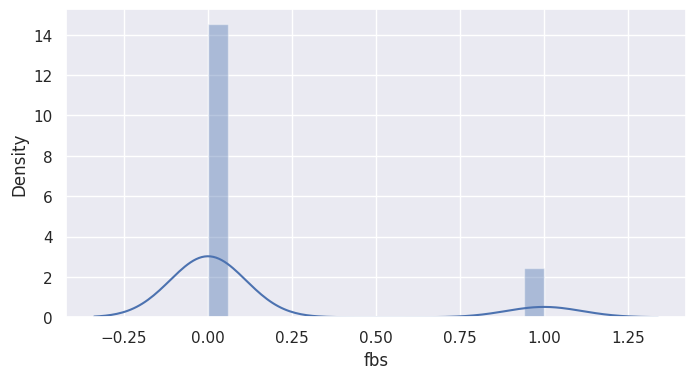

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


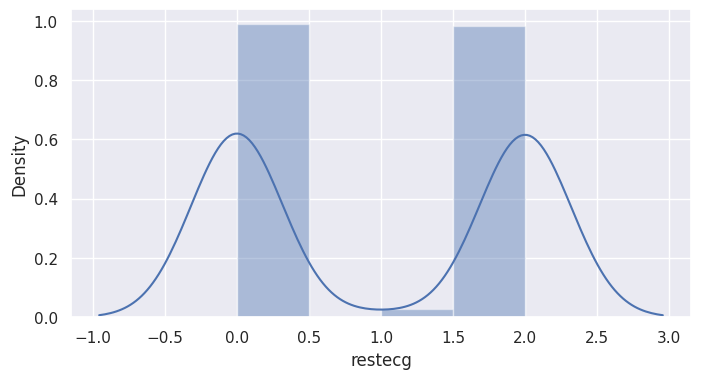

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


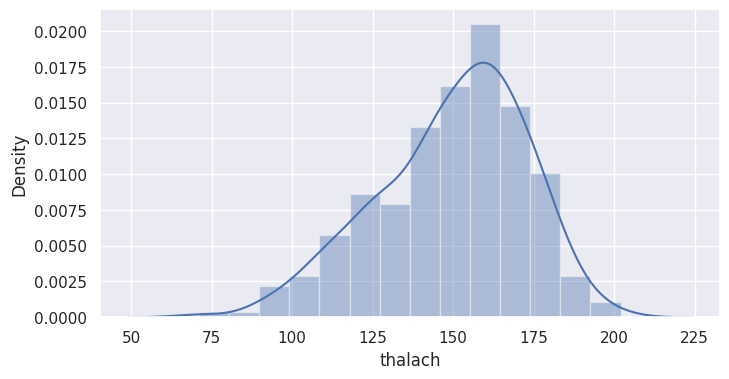

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


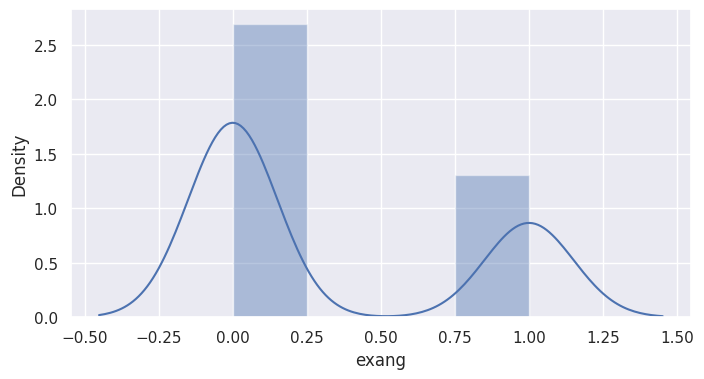

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


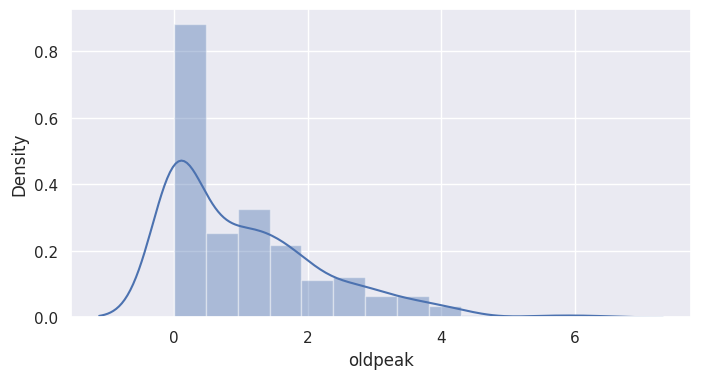

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


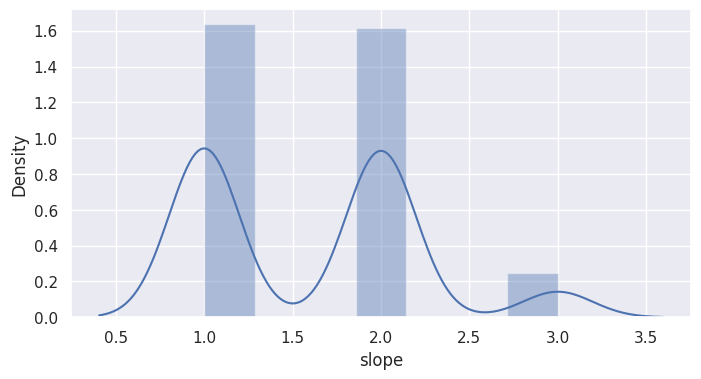

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


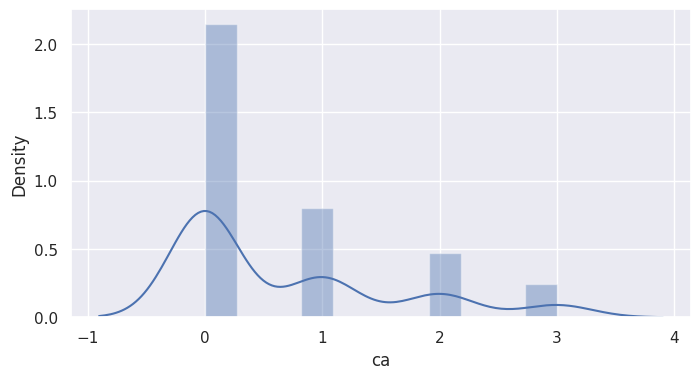

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


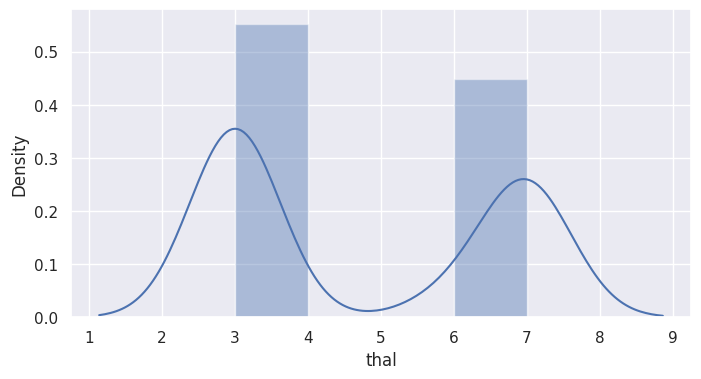

<ipython-input-10-7709439c3df8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])


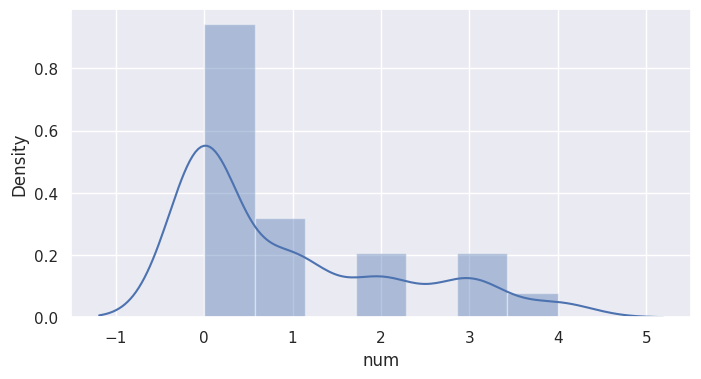

In [10]:
for column in dataset:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(dataset[column])
    plt.show()

As it has been observed from the Q-Q Plot and the distplot, it can be concluded that the column values they follow these distributions:

age         Normal Distribution
sex         Binomial Distribution
cp          Multimodal Distribution
trestbps    Normal Distribution
chol        Normal Distribution
fbs         Normal Distribution
restecg     Binomial Distribution
thalach     Normal Distribution
exang       Binomial Distribution
oldpeak     Poisson Distribution
slope       Multimodal Distribution
ca          Multimodal Distribution
thal        Normal Distribution


### Which independent variables are useful to predict a target (dependent variable)?

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


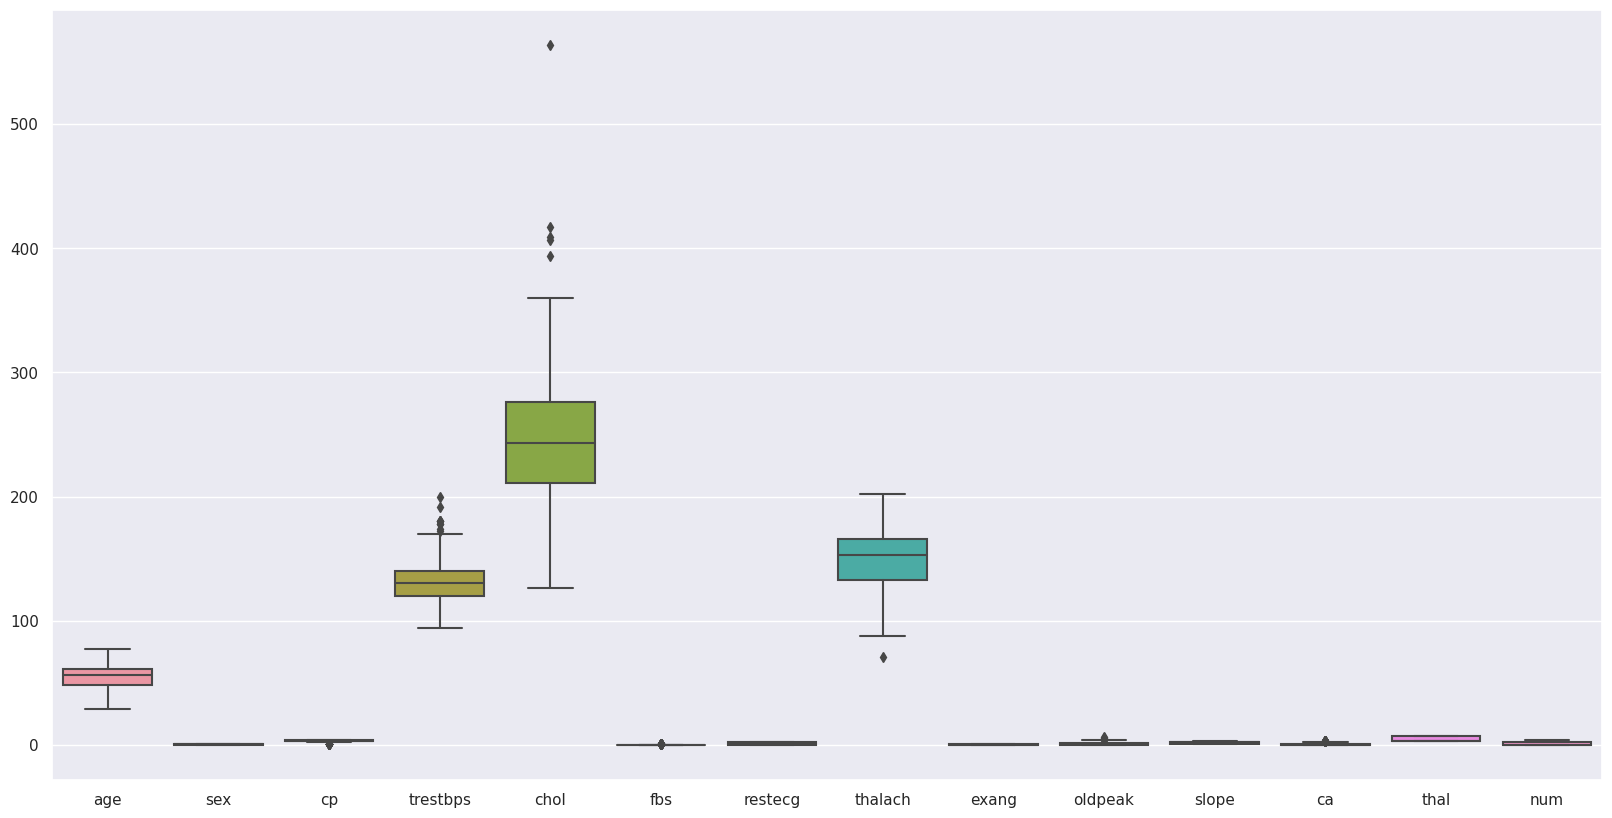

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data = dataset)
dataset.describe()

<Figure size 2000x700 with 0 Axes>

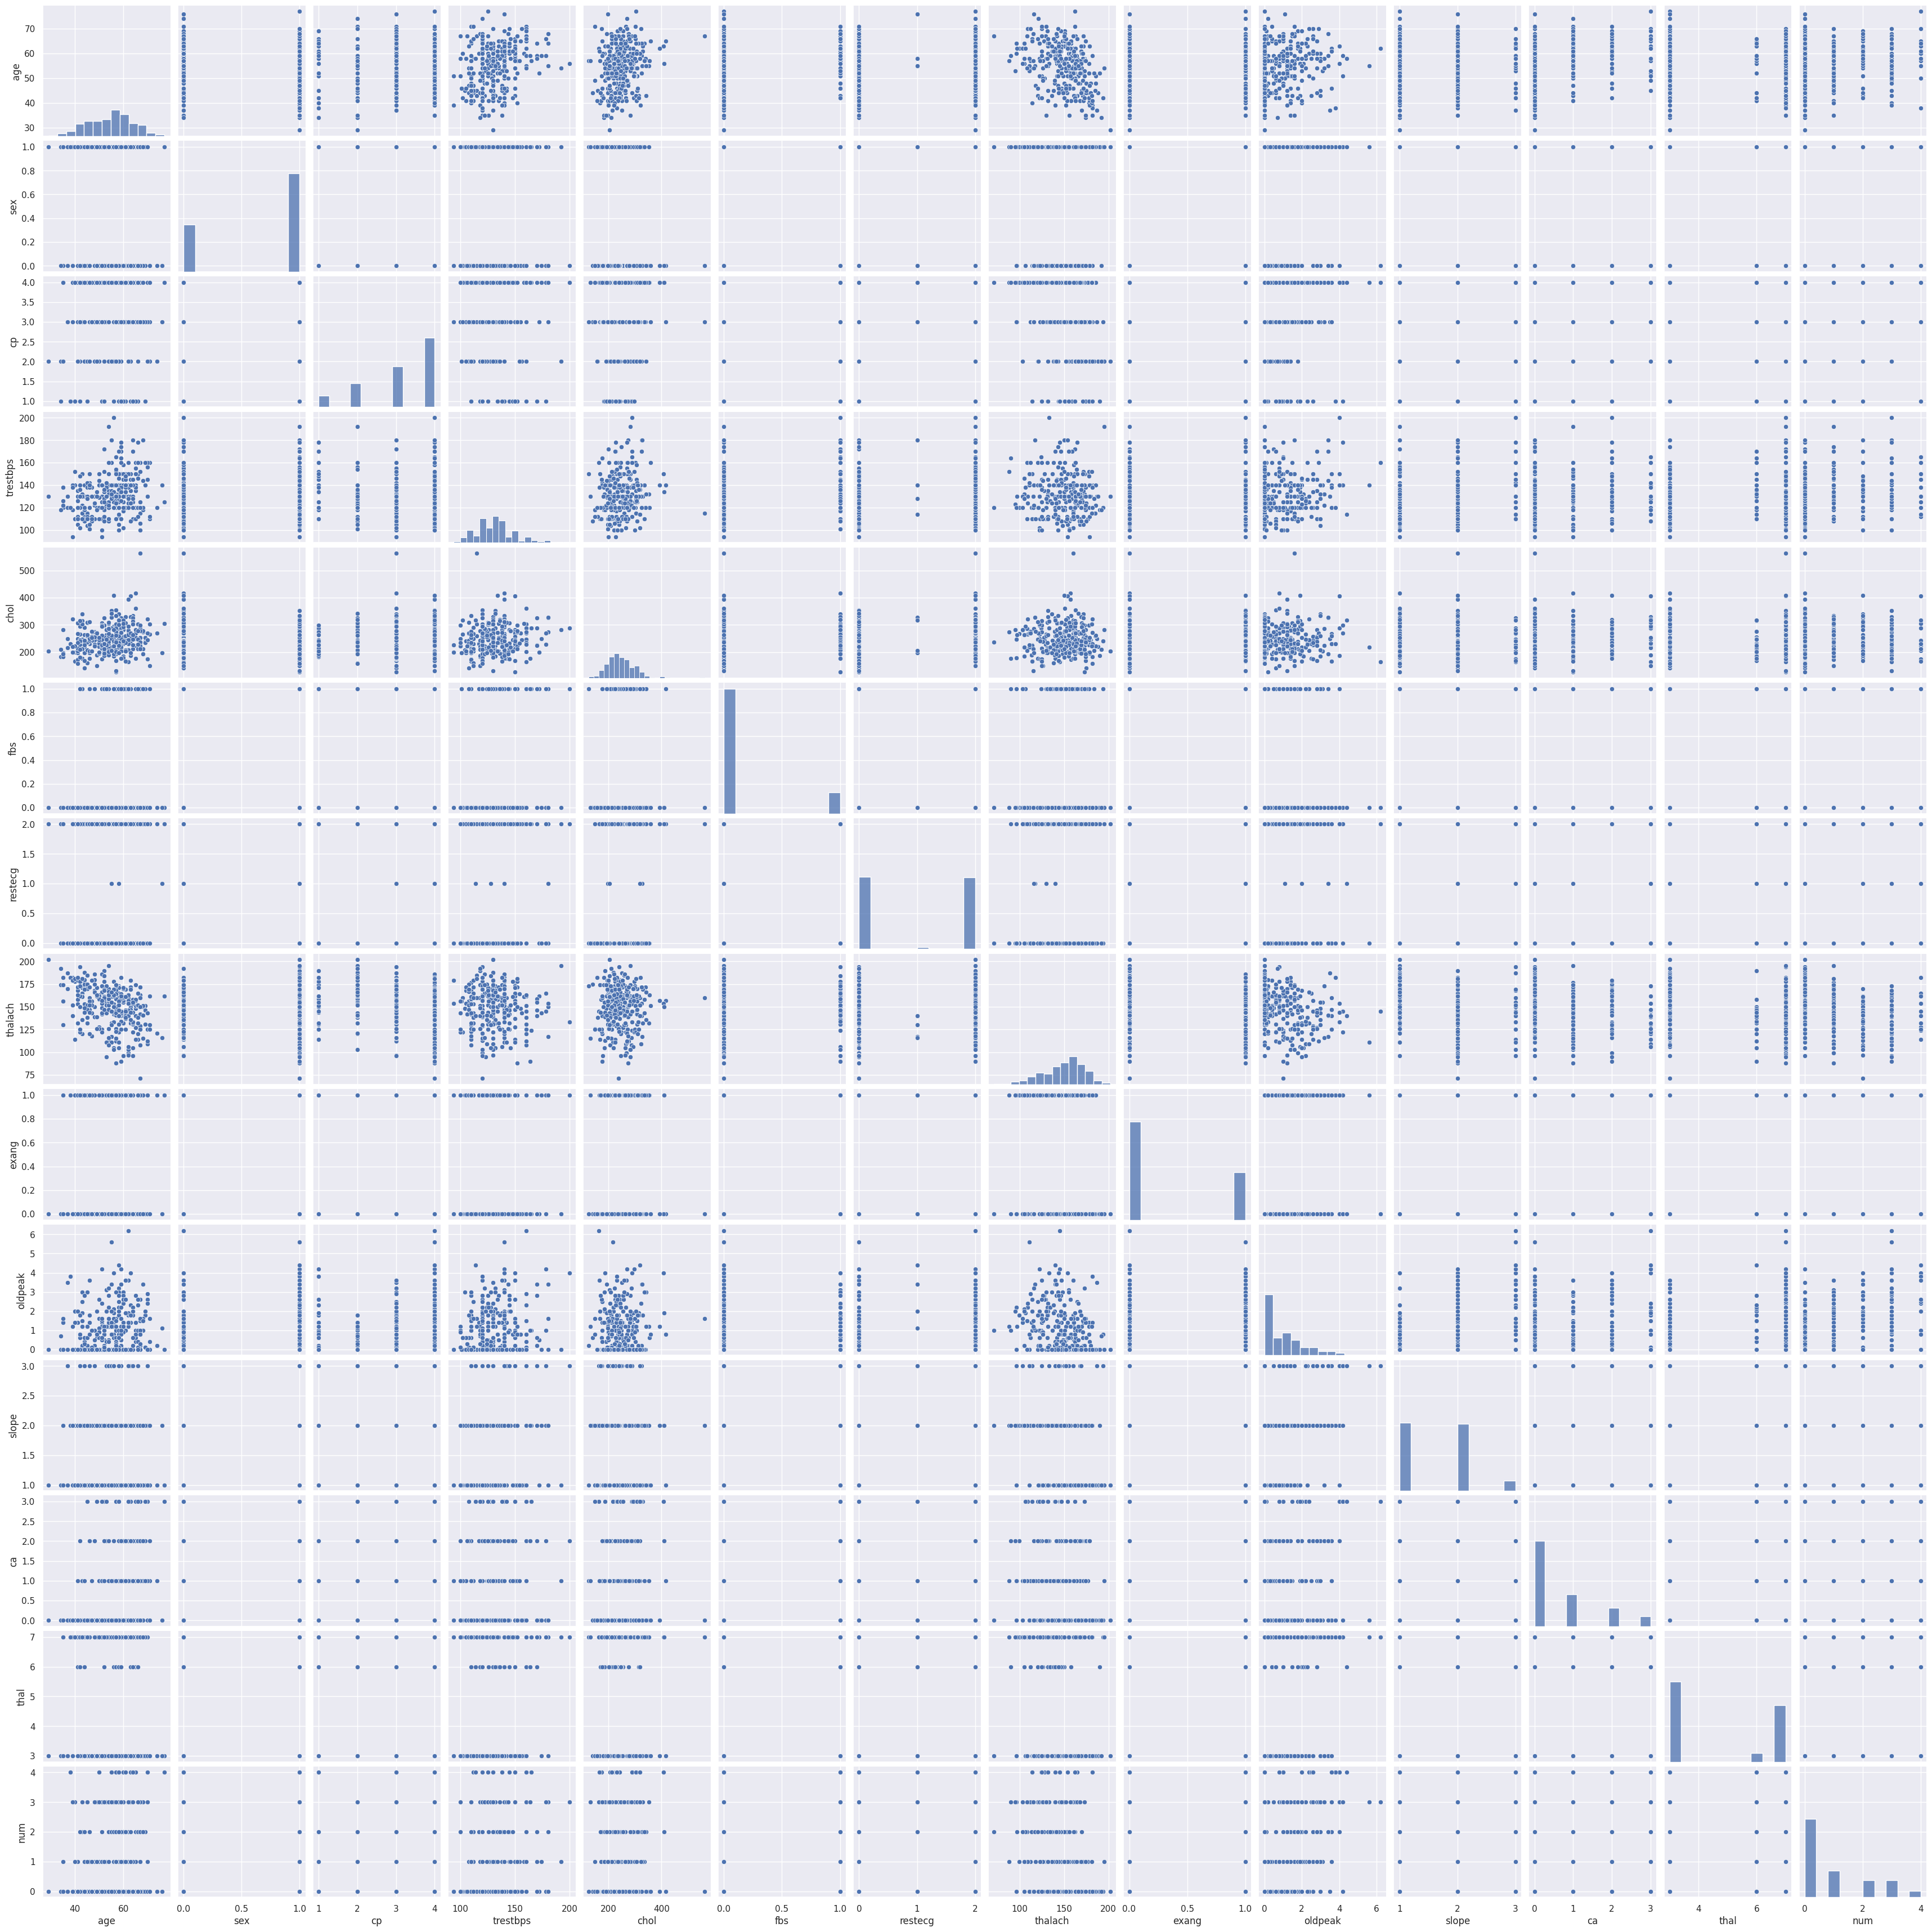

In [12]:
plt.figure(figsize=(20,7))
sns.pairplot(dataset)

In [13]:
dataset.head()
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


<Axes: >

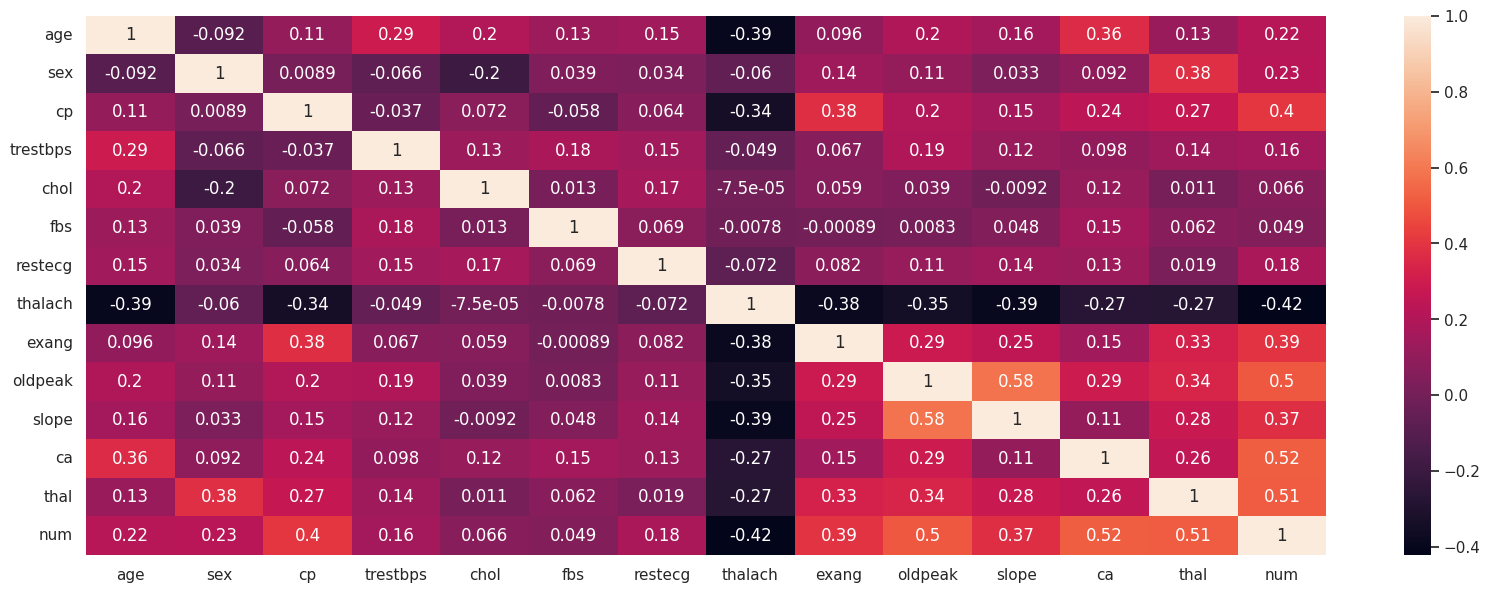

In [14]:
plt.figure(figsize=(20, 7))
sns.heatmap(dataset.corr(), annot=True)

Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

Correlation shows whether the characteristics are related to each other or to the target variable. Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.

In this case, it can be seen that all the variables are equally important for generating insights on the data, though, some variables tend to be significantly more important than the others.

### Do the training and test sets have the same data?
No, the training and test sets don't have the same data. The data has been split into a splice of 25% for validation of the model and 75% for training the model.

In [15]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
dataset.columns = dataset.columns.str.strip()
X_train, X_validation, Y_train, Y_validation = train_test_split(data_features, dataset["num"], test_size=0.25, random_state=1, shuffle=True)
Y_train.describe()

count    222.000000
mean       0.959459
std        1.263184
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [17]:
print(regressor.intercept_)
print(regressor.coef_)

-1.042152507451661
[-6.27919127e-03  2.68660692e-01  1.51527006e-01  4.78478723e-03
  4.27083636e-04 -2.92114805e-01  1.47783956e-01 -4.84261077e-03
  1.60662451e-01  2.51507522e-01  2.01478979e-01  4.75216247e-01
  1.30888147e-01]


In [18]:
linearRegression = regressor.predict(X_validation)

In [19]:
print("Train Score {:.2f}".format(regressor.score(X_train,Y_train)))
print("Test Score {:.2f}".format(regressor.score(X_validation, Y_validation)))

Train Score 0.60
Test Score 0.40


In [20]:
model = sm.OLS(
        dataset["num"],
    dataset[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    num   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              58.36
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    2.97e-72
Time:                        03:05:21   Log-Likelihood:                         -359.17
No. Observations:                 297   AIC:                                      744.3
Df Residuals:                     284   BIC:                                      792.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0112      0.006     -1.979      0.049      -0.022   -6.25e-05
sex            0.1576      0.114      1.378      0.169      -0.067       0.383
cp             0.1770      0.054      3.302      0.001       0.072       0.283
trestbps       0.0035      0.003      1.230      0.220      -0.002       0.009
chol        5.487e-05      0.001      0.056      0.955      -0.002       0.002
fbs           -0.0707      0.141     -0.500      0.617      -0.349       0.208
restecg        0.1040      0.050      2.065      0.040       0.005       0.203
thalach       -0.0074      0.002     -4.003      0.000      -0.011      -0.004
exang          0.2215      0.120      1.843      0.066      -0.015       0.458
oldpeak        0.1870      0.054      3.434      0.001       0.080       0.294
slope          0.1347      0.096      1.404      0.161      -0.054       0.323
ca             0.4376      0.059      7.356      0.000       0.321       0.555
thal           0.1404      0.031      4.579      0.000       0.080       0.201
==============================================================================
Omnibus:                       19.497   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.289
Skew:                           0.524   Prob(JB):                     5.32e-06
Kurtosis:                       3.929   Cond. No.                         961.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.model_selection import train_test_split

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(dataset[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"]], dataset["num"], test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

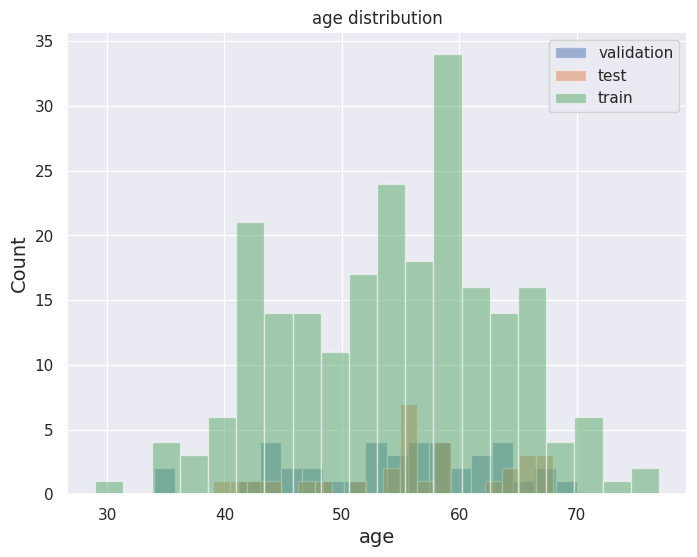

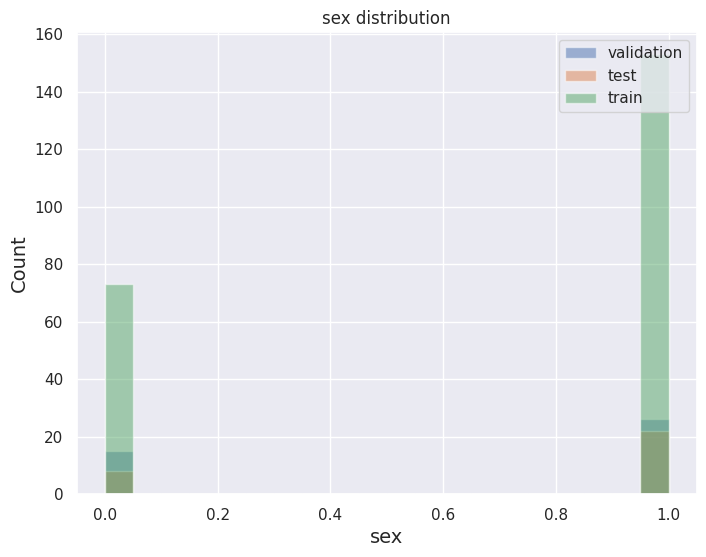

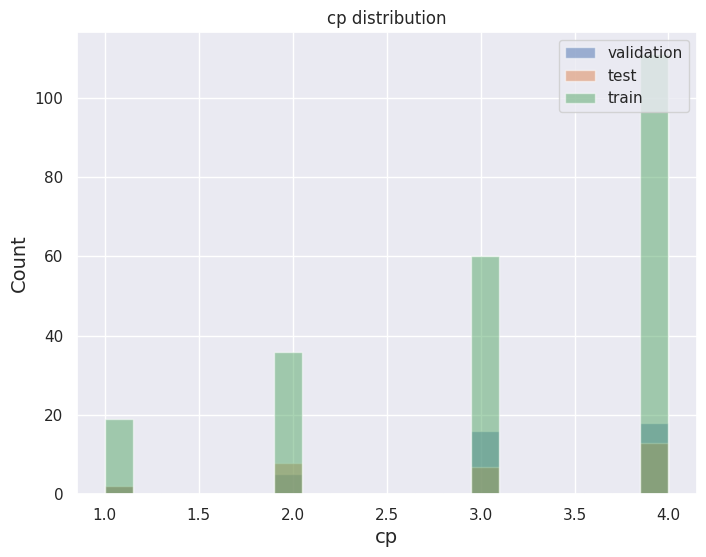

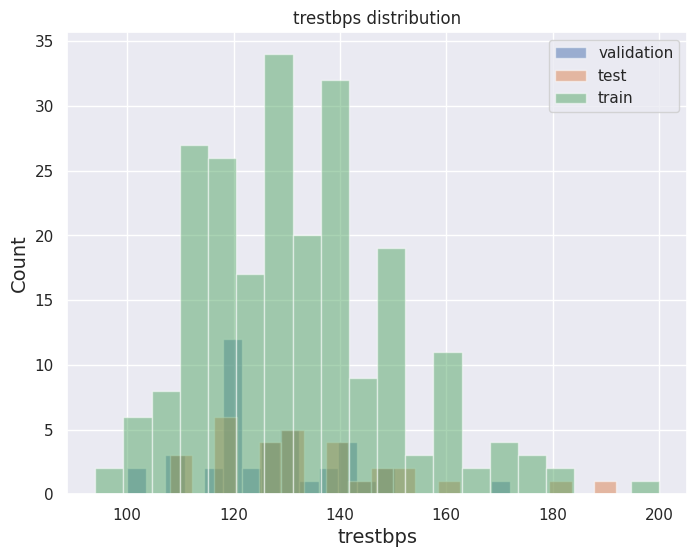

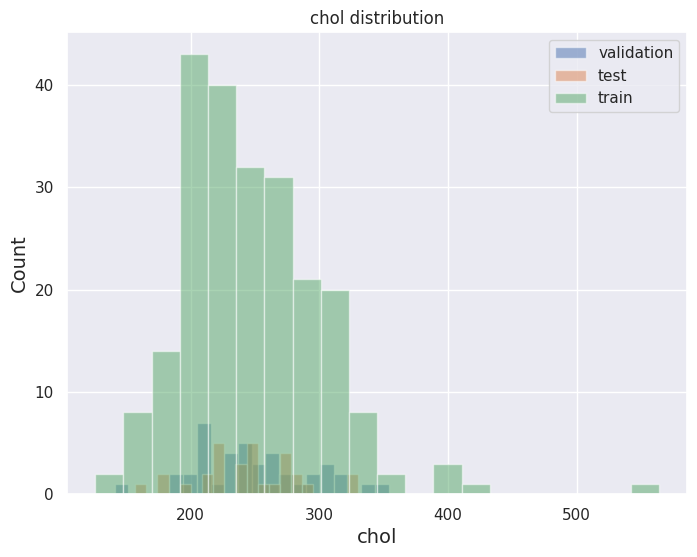

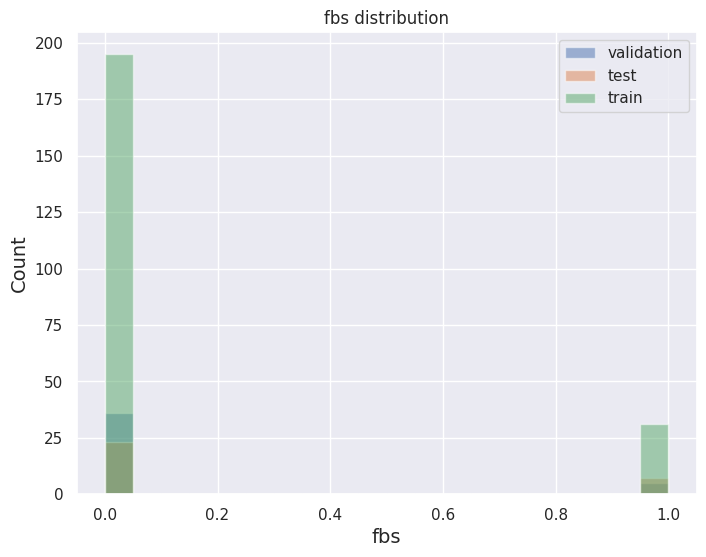

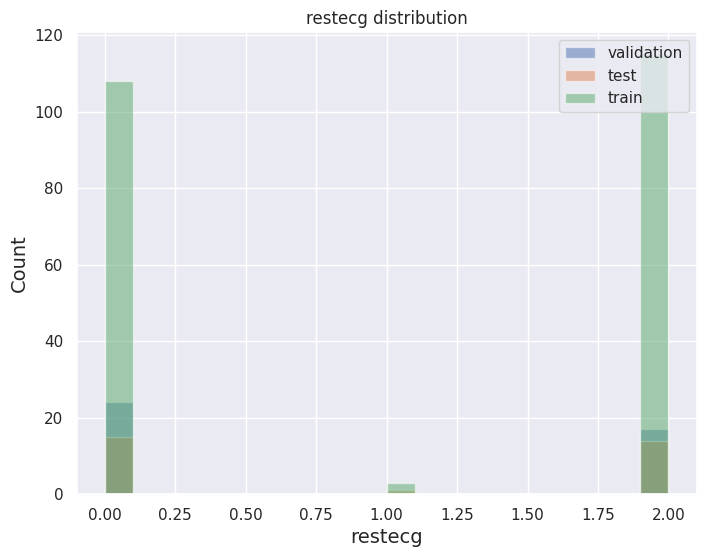

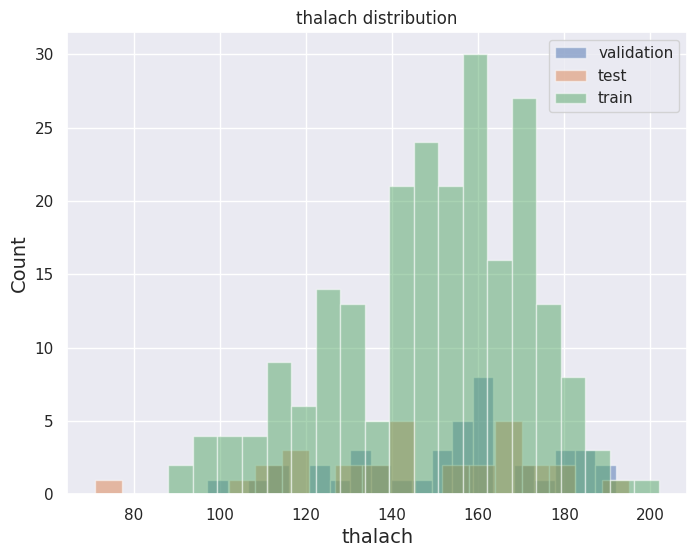

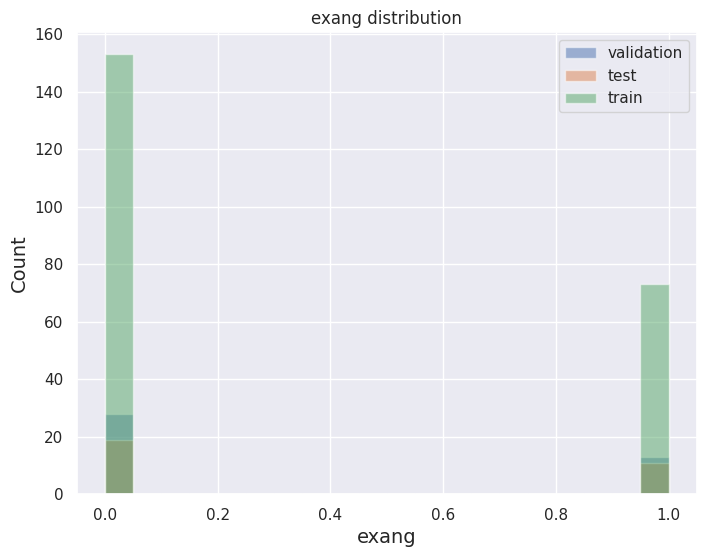

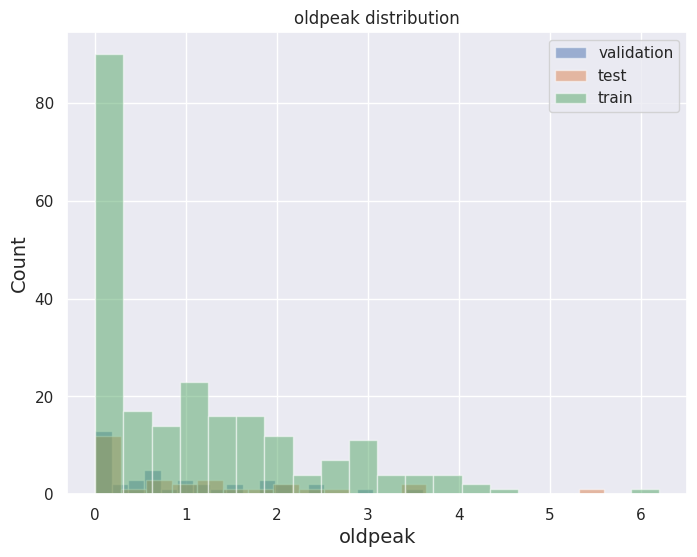

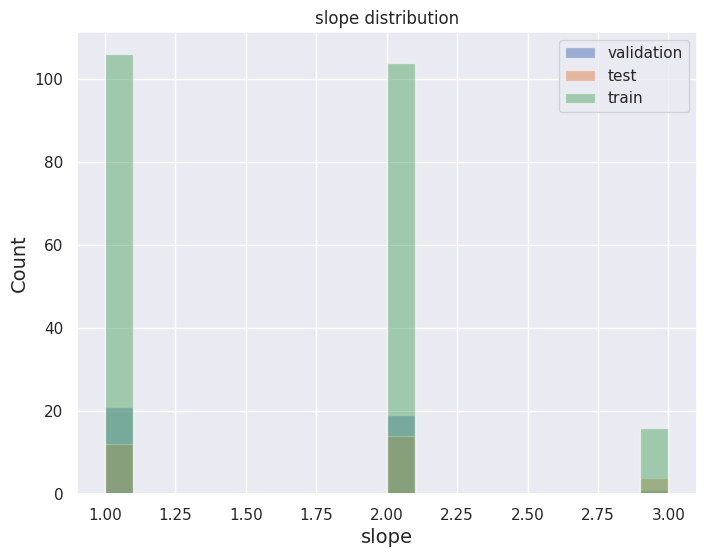

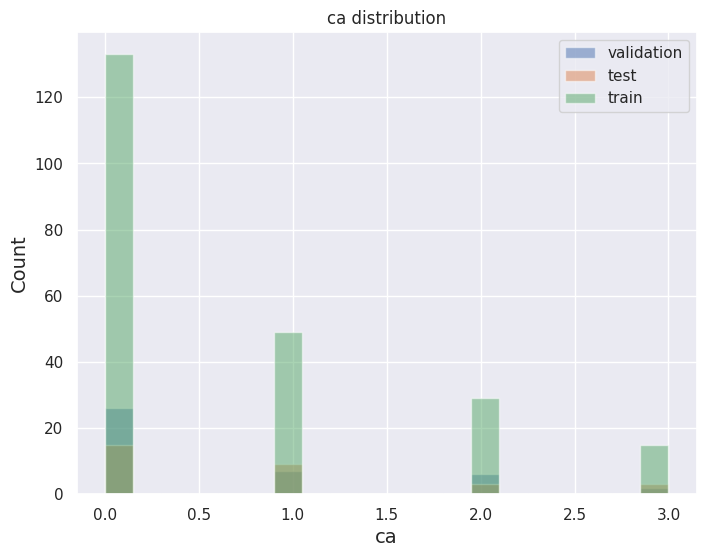

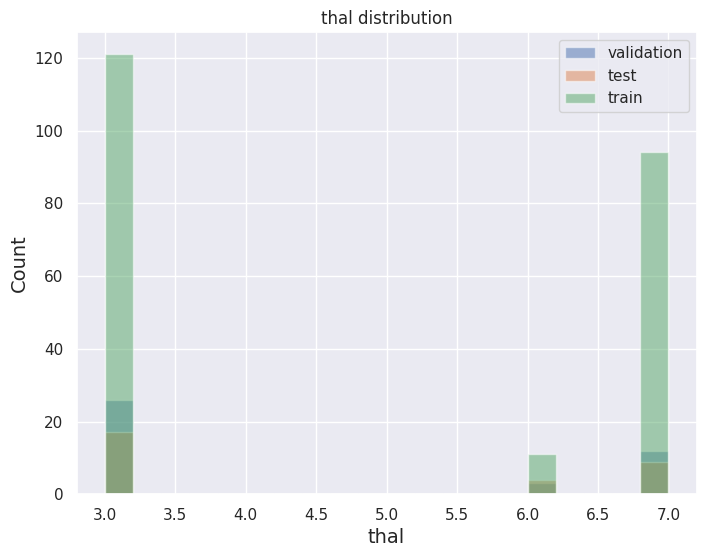

In [22]:
X_test_plot = X_test[
    [
        "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"
    ]
]

X_val_plot = X_val[
    [
        "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"
    ]
]

X_train_plot = X_train[
    [
        "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.72
Coefficient of determination: 0.55
R^2 score on tarining set = 0.545074498287917


In [26]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.52
Coefficient of determination: 0.53
R^2 score on test set = 0.5264944592600964


In [27]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.43
Coefficient of determination: 0.69
R^2 score on validation set = 0.6899352197160435


### Which predictor variables are the most important?

In [28]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
independent_columns = dataset[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"]]  #independent columns
target_column = dataset[["num"]]    #target column
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(independent_columns,target_column)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  219.883557
11        ca  107.213553
9    oldpeak   98.505523
12      thal   70.520283
8      exang   39.119182
4       chol   38.167452
0        age   27.975233
3   trestbps   19.348090
2         cp   16.383180
6    restecg   13.026434
10     slope   10.178421
1        sex    7.511646


After running certain Statistical tests, we may need to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 13 of the best features from the Heart Disease Dataset.

As we can see, that the more important the dependent variable is deemed after the Select KBest approach, the higher the score.
We can see that thalach, ca, oldpeak, thal and exang are some of the highest ranked columns here.

Since the heart disease dataset has the target variable as 'num' and num can have values from [0,1,2,3,4] where 0 represents No Heart Disease and 1,2,3,4 represent the presence of heart ailments, but different value corresponding to a different seriousness of the disease. As a result, we have also prepared the Classification Models and evaluated them accordingly for our better understanding and to see where we can get better results, regressors or classifiers.

In [29]:
#Classification Problem
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
threshold=0.5
logisticRegr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 2, 0, 0, 1, 3, 3, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0])

In [30]:
s1= logisticRegr.predict(X_test)
rms = mean_squared_error(y_test, s1, squared=False)
rms

0.9660917830792959

In [31]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, s1)
print(cf_matrix)

[[13  0  0  0]
 [ 5  0  0  1]
 [ 2  1  0  5]
 [ 0  1  1  1]]


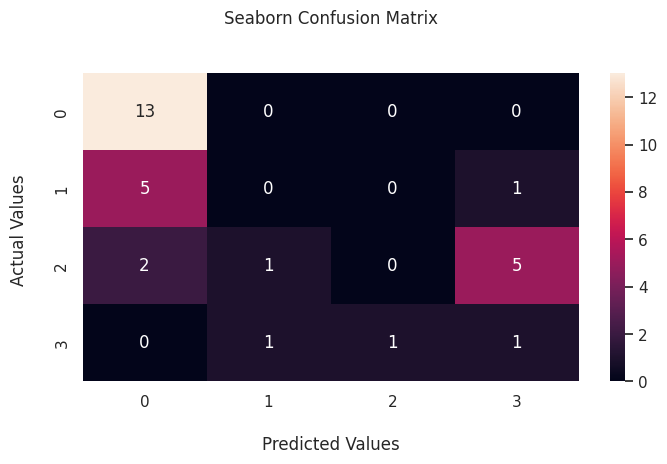

In [32]:
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values \n');
## Display the visualization of the Confusion Matrix.
plt.show()

### Remove outliers and keep outliers (does if have an effect of the final predictive model)?
This dataset doesn't have outliers which are unimportant, as a result, they do form important parts of the heart disease observations. So no value or test results can be considered as outliers because, they have been performed on real patients.

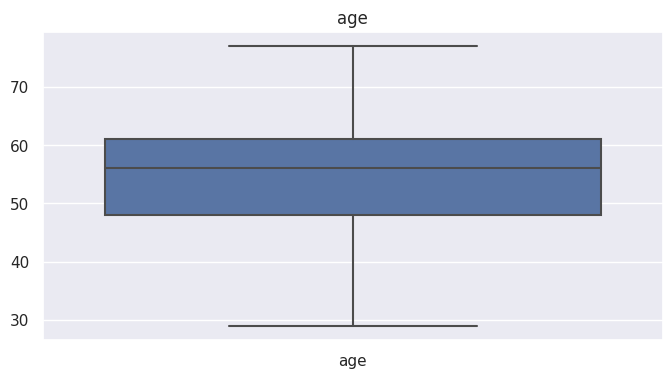

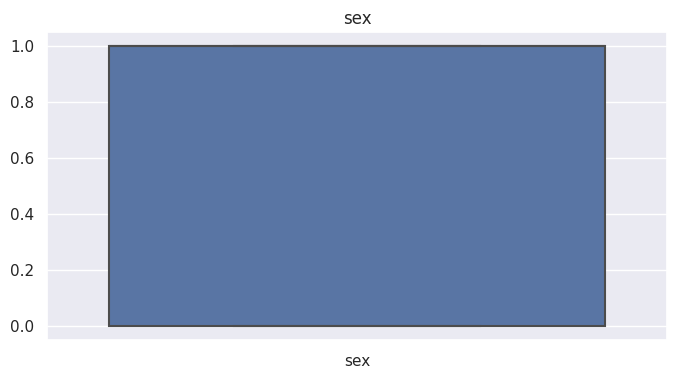

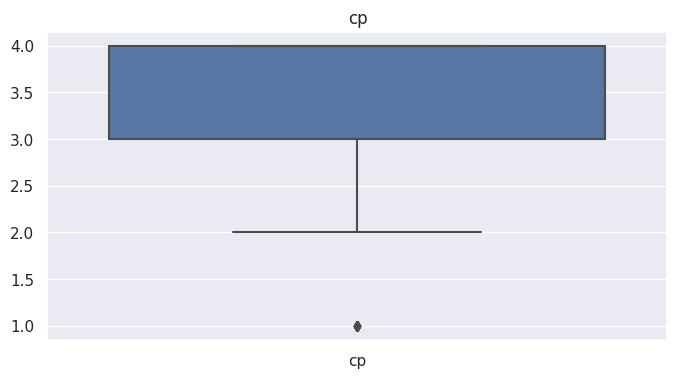

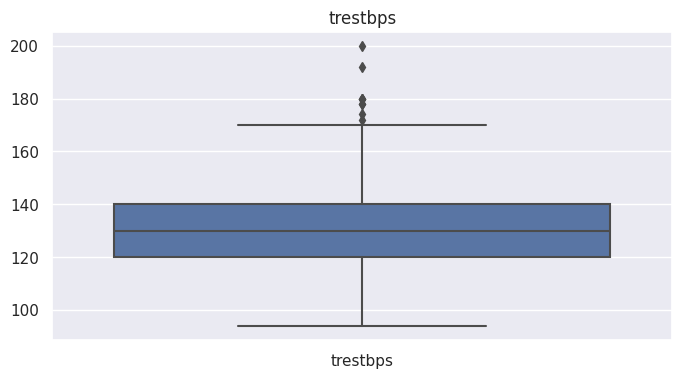

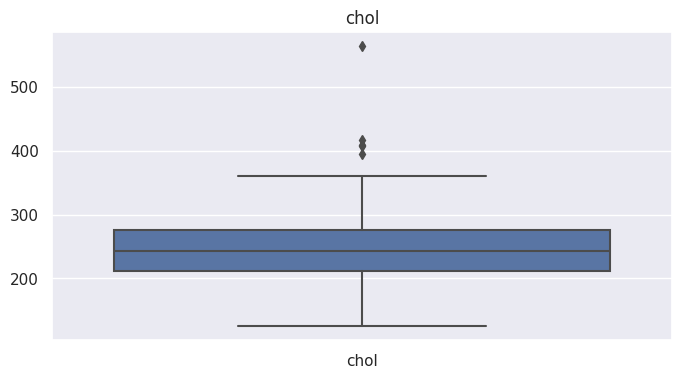

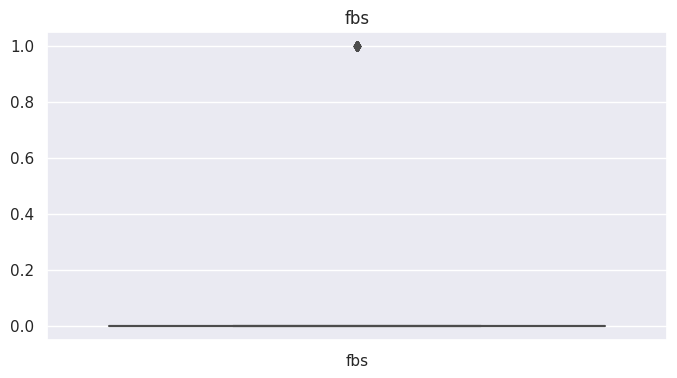

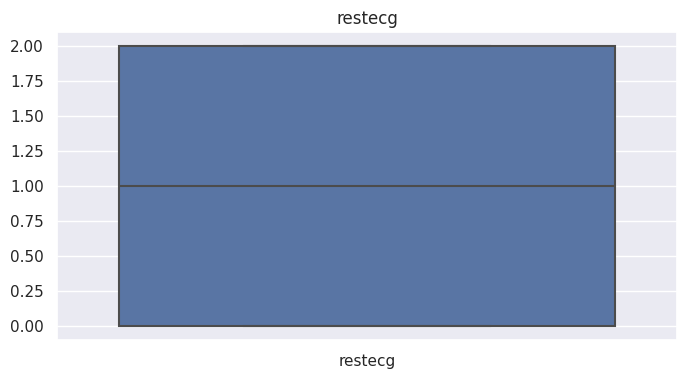

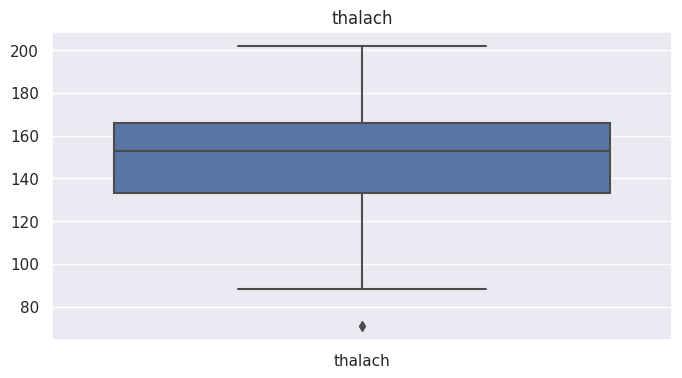

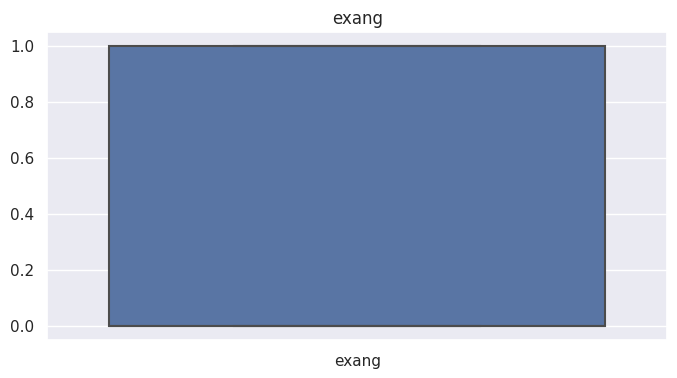

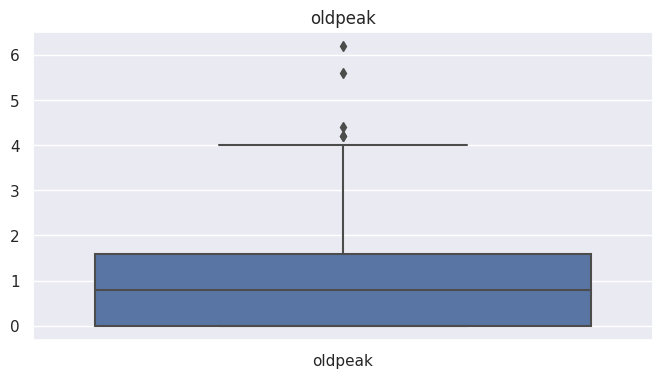

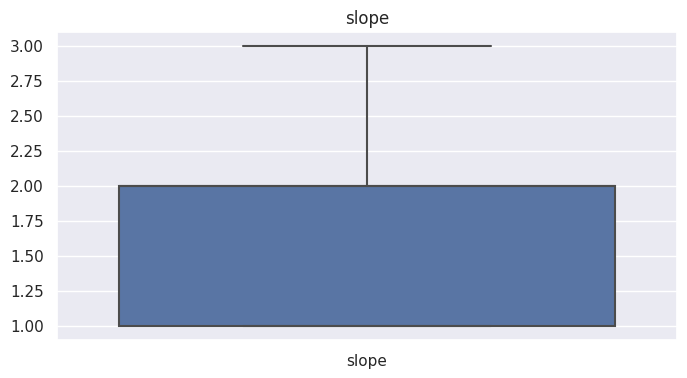

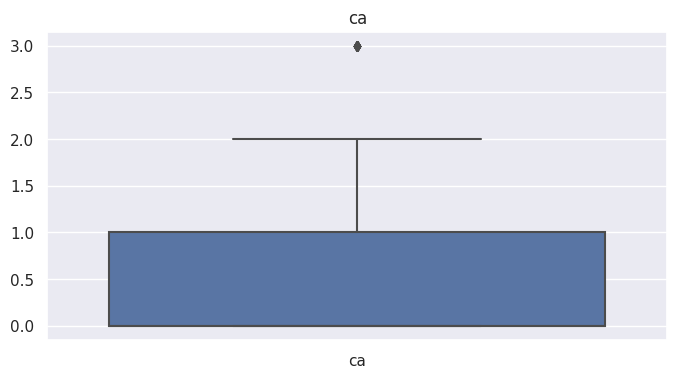

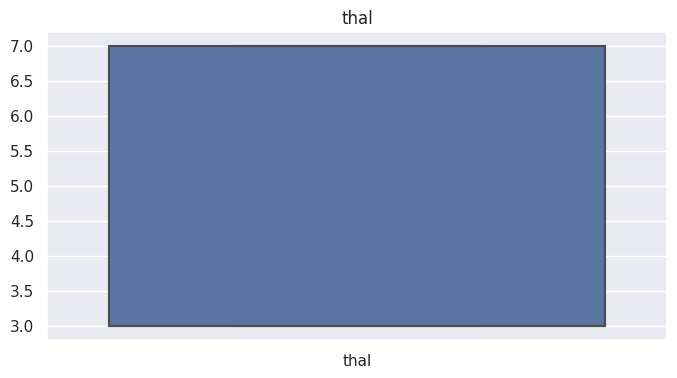

In [33]:
dataset_oa = dataset[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"]]
for column in dataset_oa:
    sns.boxplot(data=dataset[[column]])
    plt.title(column)
    plt.show()

### Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?

In [34]:
p = 0.1
mask = np.random.choice([True, False], size = dataset.shape, p = [p, 1 - p])
new_df = dataset.mask(mask)
print(new_df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     NaN  NaN  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0    NaN  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0      NaN    0.0      3.5   
4    41.0  NaN  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0       NaN  264.0  0.0      0.0      NaN    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  NaN       NaN  131.0  0.0      NaN    115.0    1.0      1.2   
301   NaN  0.0  2.0     130.0  236.0  0.0      2.0    174.0    NaN      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0 

In [35]:
#Mean Imputation
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.671
Method:                 Least Squares   F-statistic:                              47.49
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    2.04e-63
Time:                        03:05:32   Log-Likelihood:                         -374.96
No. Observations:                 297   AIC:                                      775.9
Df Residuals:                     284   BIC:                                      823.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0014      0.006     -0.227      0.821      -0.014       0.011
1              0.2370      0.124      1.905      0.058      -0.008       0.482
2              0.0885      0.060      1.464      0.144      -0.030       0.207
3              0.0011      0.003      0.348      0.728      -0.005       0.007
4             -0.0001      0.001     -0.125      0.900      -0.002       0.002
5             -0.0882      0.154     -0.572      0.568      -0.392       0.215
6              0.1047      0.057      1.844      0.066      -0.007       0.216
7             -0.0074      0.002     -3.467      0.001      -0.012      -0.003
8              0.3067      0.129      2.379      0.018       0.053       0.560
9              0.1323      0.060      2.201      0.029       0.014       0.251
10             0.1770      0.104      1.699      0.090      -0.028       0.382
11             0.3995      0.064      6.283      0.000       0.274       0.525
12             0.1440      0.032      4.508      0.000       0.081       0.207
==============================================================================
Omnibus:                       20.108   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.599
Skew:                           0.570   Prob(JB):                     7.51e-06
Kurtosis:                       3.780   Cond. No.                         993.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              36.41
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    6.83e-53
Time:                        03:05:33   Log-Likelihood:                         -395.25
No. Observations:                 297   AIC:                                      816.5
Df Residuals:                     284   BIC:                                      864.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0014      0.007      0.214      0.830      -0.012       0.015
1              0.2633      0.129      2.042      0.042       0.009       0.517
2              0.1387      0.064      2.160      0.032       0.012       0.265
3             -0.0011      0.003     -0.331      0.741      -0.008       0.005
4             -0.0005      0.001     -0.415      0.678      -0.003       0.002
5             -0.1424      0.164     -0.869      0.385      -0.465       0.180
6              0.1121      0.061      1.851      0.065      -0.007       0.231
7             -0.0064      0.002     -2.816      0.005      -0.011      -0.002
8              0.3070      0.136      2.255      0.025       0.039       0.575
9              0.1476      0.064      2.289      0.023       0.021       0.275
10             0.1384      0.109      1.273      0.204      -0.076       0.352
11             0.3648      0.067      5.473      0.000       0.234       0.496
12             0.1273      0.033      3.904      0.000       0.063       0.191
==============================================================================
Omnibus:                       15.616   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.568
Skew:                           0.435   Prob(JB):                     5.63e-05
Kurtosis:                       3.907   Cond. No.                         984.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              36.99
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    1.71e-53
Time:                        03:05:33   Log-Likelihood:                         -393.77
No. Observations:                 297   AIC:                                      813.5
Df Residuals:                     284   BIC:                                      861.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0011      0.007      0.164      0.870      -0.012       0.014
1              0.2476      0.128      1.934      0.054      -0.004       0.500
2              0.1534      0.059      2.582      0.010       0.036       0.270
3             -0.0021      0.003     -0.648      0.518      -0.008       0.004
4             -0.0006      0.001     -0.531      0.596      -0.003       0.002
5             -0.1533      0.163     -0.940      0.348      -0.474       0.168
6              0.0861      0.057      1.515      0.131      -0.026       0.198
7             -0.0059      0.002     -2.643      0.009      -0.010      -0.002
8              0.3006      0.135      2.224      0.027       0.035       0.567
9              0.1260      0.062      2.043      0.042       0.005       0.247
10             0.2185      0.105      2.079      0.039       0.012       0.425
11             0.3740      0.066      5.637      0.000       0.243       0.505
12             0.1221      0.033      3.753      0.000       0.058       0.186
==============================================================================
Omnibus:                       15.299   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.325
Skew:                           0.425   Prob(JB):                     6.36e-05
Kurtosis:                       3.916   Cond. No.                         979.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
p = 0.05
mask = np.random.choice([True, False], size = dataset.shape, p = [p, 1 - p])
new_df = dataset.mask(mask)
print(new_df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2     NaN  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  NaN  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0       NaN  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  NaN      NaN    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0 

In [39]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.695
Method:                 Least Squares   F-statistic:                              53.17
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    3.45e-68
Time:                        03:05:33   Log-Likelihood:                         -366.76
No. Observations:                 297   AIC:                                      759.5
Df Residuals:                     284   BIC:                                      807.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0068      0.006     -1.170      0.243      -0.018       0.005
1              0.1468      0.120      1.228      0.221      -0.089       0.382
2              0.1871      0.056      3.328      0.001       0.076       0.298
3              0.0016      0.003      0.561      0.576      -0.004       0.007
4           8.582e-05      0.001      0.084      0.933      -0.002       0.002
5             -0.0871      0.149     -0.584      0.560      -0.381       0.206
6              0.1265      0.053      2.398      0.017       0.023       0.230
7             -0.0071      0.002     -3.646      0.000      -0.011      -0.003
8              0.3239      0.126      2.574      0.011       0.076       0.572
9              0.1774      0.056      3.157      0.002       0.067       0.288
10             0.1118      0.101      1.105      0.270      -0.087       0.311
11             0.4023      0.063      6.405      0.000       0.279       0.526
12             0.1265      0.032      4.000      0.000       0.064       0.189
==============================================================================
Omnibus:                       14.610   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.481
Skew:                           0.508   Prob(JB):                     0.000435
Kurtosis:                       3.468   Cond. No.                         987.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.658
Method:                 Least Squares   F-statistic:                              44.96
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    3.67e-61
Time:                        03:05:33   Log-Likelihood:                         -381.48
No. Observations:                 297   AIC:                                      789.0
Df Residuals:                     284   BIC:                                      837.0
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0061      0.006     -1.008      0.315      -0.018       0.006
1              0.1518      0.124      1.221      0.223      -0.093       0.397
2              0.1729      0.059      2.940      0.004       0.057       0.289
3              0.0013      0.003      0.428      0.669      -0.005       0.007
4              0.0002      0.001      0.148      0.882      -0.002       0.002
5             -0.0558      0.156     -0.357      0.721      -0.363       0.252
6              0.1069      0.054      1.981      0.049       0.001       0.213
7             -0.0069      0.002     -3.390      0.001      -0.011      -0.003
8              0.3535      0.129      2.732      0.007       0.099       0.608
9              0.1789      0.058      3.063      0.002       0.064       0.294
10             0.1189      0.104      1.144      0.254      -0.086       0.323
11             0.3707      0.065      5.740      0.000       0.244       0.498
12             0.1261      0.032      3.887      0.000       0.062       0.190
==============================================================================
Omnibus:                       12.439   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.970
Skew:                           0.408   Prob(JB):                     0.000926
Kurtosis:                       3.682   Cond. No.                         983.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.672
Model:                            OLS   Adj. R-squared (uncentered):              0.656
Method:                 Least Squares   F-statistic:                              44.66
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    6.81e-61
Time:                        03:05:33   Log-Likelihood:                         -382.14
No. Observations:                 297   AIC:                                      790.3
Df Residuals:                     284   BIC:                                      838.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0059      0.006     -0.976      0.330      -0.018       0.006
1              0.1451      0.124      1.166      0.245      -0.100       0.390
2              0.1762      0.059      3.004      0.003       0.061       0.292
3              0.0010      0.003      0.344      0.731      -0.005       0.007
4           5.286e-05      0.001      0.049      0.961      -0.002       0.002
5             -0.0645      0.156     -0.413      0.680      -0.372       0.243
6              0.1052      0.054      1.937      0.054      -0.002       0.212
7             -0.0066      0.002     -3.264      0.001      -0.011      -0.003
8              0.3695      0.129      2.865      0.004       0.116       0.623
9              0.1632      0.057      2.839      0.005       0.050       0.276
10             0.1307      0.103      1.270      0.205      -0.072       0.333
11             0.3767      0.065      5.764      0.000       0.248       0.505
12             0.1258      0.033      3.859      0.000       0.062       0.190
==============================================================================
Omnibus:                       12.846   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.331
Skew:                           0.422   Prob(JB):                     0.000773
Kurtosis:                       3.669   Cond. No.                         979.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
p = 0.01
mask = np.random.choice([True, False], size = dataset.shape, p = [p, 1 - p])
new_df = dataset.mask(mask)
print(new_df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  NaN      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0 

In [43]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              57.98
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    5.81e-72
Time:                        03:05:33   Log-Likelihood:                         -360.07
No. Observations:                 297   AIC:                                      746.1
Df Residuals:                     284   BIC:                                      794.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0111      0.006     -1.945      0.053      -0.022       0.000
1              0.1581      0.115      1.380      0.169      -0.067       0.384
2              0.1739      0.054      3.220      0.001       0.068       0.280
3              0.0037      0.003      1.304      0.193      -0.002       0.009
4              0.0001      0.001      0.112      0.911      -0.002       0.002
5             -0.0996      0.146     -0.681      0.496      -0.387       0.188
6              0.1117      0.051      2.196      0.029       0.012       0.212
7             -0.0077      0.002     -4.128      0.000      -0.011      -0.004
8              0.1999      0.121      1.648      0.100      -0.039       0.439
9              0.2094      0.054      3.875      0.000       0.103       0.316
10             0.1175      0.096      1.230      0.220      -0.071       0.305
11             0.4253      0.060      7.060      0.000       0.307       0.544
12             0.1440      0.031      4.701      0.000       0.084       0.204
==============================================================================
Omnibus:                       19.507   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.171
Skew:                           0.527   Prob(JB):                     5.64e-06
Kurtosis:                       3.917   Cond. No.                         990.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              57.14
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    2.56e-71
Time:                        03:05:33   Log-Likelihood:                         -361.45
No. Observations:                 297   AIC:                                      748.9
Df Residuals:                     284   BIC:                                      796.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0113      0.006     -1.973      0.049      -0.023   -2.55e-05
1              0.1620      0.115      1.411      0.159      -0.064       0.388
2              0.1698      0.054      3.123      0.002       0.063       0.277
3              0.0036      0.003      1.256      0.210      -0.002       0.009
4              0.0002      0.001      0.202      0.840      -0.002       0.002
5             -0.0982      0.146     -0.671      0.503      -0.387       0.190
6              0.1061      0.051      2.074      0.039       0.005       0.207
7             -0.0076      0.002     -4.087      0.000      -0.011      -0.004
8              0.2053      0.122      1.689      0.092      -0.034       0.444
9              0.2035      0.054      3.743      0.000       0.096       0.310
10             0.1415      0.096      1.473      0.142      -0.048       0.331
11             0.4247      0.060      7.028      0.000       0.306       0.544
12             0.1406      0.031      4.565      0.000       0.080       0.201
==============================================================================
Omnibus:                       19.921   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.595
Skew:                           0.538   Prob(JB):                     4.56e-06
Kurtosis:                       3.911   Cond. No.                         988.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
result = pd.DataFrame(imp.fit_transform(new_df))
model = sm.OLS(
        result[13],
    result[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     13   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              57.13
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    2.57e-71
Time:                        03:05:33   Log-Likelihood:                         -361.46
No. Observations:                 297   AIC:                                      748.9
Df Residuals:                     284   BIC:                                      796.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0116      0.006     -2.014      0.045      -0.023      -0.000
1              0.1589      0.115      1.384      0.167      -0.067       0.385
2              0.1785      0.054      3.284      0.001       0.071       0.285
3              0.0037      0.003      1.306      0.193      -0.002       0.009
4              0.0002      0.001      0.208      0.835      -0.002       0.002
5             -0.1008      0.147     -0.688      0.492      -0.389       0.188
6              0.1063      0.051      2.086      0.038       0.006       0.207
7             -0.0077      0.002     -4.121      0.000      -0.011      -0.004
8              0.1994      0.122      1.638      0.103      -0.040       0.439
9              0.1988      0.054      3.705      0.000       0.093       0.304
10             0.1342      0.095      1.419      0.157      -0.052       0.320
11             0.4248      0.061      6.987      0.000       0.305       0.544
12             0.1407      0.031      4.570      0.000       0.080       0.201
==============================================================================
Omnibus:                       19.789   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.489
Skew:                           0.534   Prob(JB):                     4.81e-06
Kurtosis:                       3.916   Cond. No.                         988.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above imputations on various %ages of data, we can see that in most of the cases, the column numbers 7, 11, 9, 12, 8, 2 have lowest p-values which means they are highly significant in predicting the correct values of the num variable. The names of these columns therefore are -  
2         cp   
7    thalach  
8      exang  
9    oldpeak
11        ca  
12      thal

Hence, we can conclude these values are highly significant for efficient predictions of the target variable.

Removal of random data and imputation did result in some variations but the overall scope of the variables didn't suffer.

### Do the ranges of the predictor variables make sense?
Yes, the ranges of the predictor variables they make sense because they are well-defined, in accordance to the units recommended by the researchers those who were capturing these recordings.

### References
https://archive.ics.uci.edu/dataset/45/heart+disease
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7
https://colab.research.google.com/drive/16iFRPq0vx_CZypo4ZyJ_qTLrvds3FlDb#scrollTo=5crIBqgn9FiI&uniqifier=1
https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook
https://github.com/nikbearbrown/INFO_6105_Data_Science_Engineering_Methods/blob/sorting_branch/Assignment_1/ML_Data_Cleaning_and_Feature_Selection_Breast_Cancer.ipynb